# 1. Question: 

# Imports 

In [31]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
import torch.autograd
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt

In [32]:
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
data['PRICE'] = boston_data.target

features = data.drop(columns=['PRICE'])
target = data['PRICE']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [35]:
in_features = features.columns.size
out_features = 1
lr = 0.001
epochs = 1000

# Model 
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat
    
# Model 
model = Model(in_features, out_features)
model.cuda()

# Loss 
criterion = nn.MSELoss()

# Optimizer 
#optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

epoch 0, loss 852.5631713867188
epoch 1, loss 811.8474731445312
epoch 2, loss 772.78662109375
epoch 3, loss 735.4072875976562
epoch 4, loss 699.73193359375
epoch 5, loss 665.7783203125
epoch 6, loss 633.5594482421875
epoch 7, loss 603.082275390625
epoch 8, loss 574.3486938476562
epoch 9, loss 547.3538208007812
epoch 10, loss 522.0864868164062
epoch 11, loss 498.5286560058594
epoch 12, loss 476.65496826171875
epoch 13, loss 456.4328918457031
epoch 14, loss 437.8224182128906
epoch 15, loss 420.7760009765625
epoch 16, loss 405.2386779785156
epoch 17, loss 391.1484069824219
epoch 18, loss 378.436279296875
epoch 19, loss 367.02716064453125
epoch 20, loss 356.84014892578125
epoch 21, loss 347.7896423339844
epoch 22, loss 339.7862243652344
epoch 23, loss 332.7375183105469
epoch 24, loss 326.54974365234375
epoch 25, loss 321.1287536621094
epoch 26, loss 316.38134765625
epoch 27, loss 312.216552734375
epoch 28, loss 308.5469055175781
epoch 29, loss 305.2895202636719
epoch 30, loss 302.3671875
e

epoch 259, loss 114.25275421142578
epoch 260, loss 114.18896484375
epoch 261, loss 114.1256103515625
epoch 262, loss 114.06271362304688
epoch 263, loss 114.00022888183594
epoch 264, loss 113.93816375732422
epoch 265, loss 113.87650299072266
epoch 266, loss 113.81523895263672
epoch 267, loss 113.75435638427734
epoch 268, loss 113.69384002685547
epoch 269, loss 113.63371276855469
epoch 270, loss 113.57392120361328
epoch 271, loss 113.51449584960938
epoch 272, loss 113.45540618896484
epoch 273, loss 113.39665222167969
epoch 274, loss 113.33821105957031
epoch 275, loss 113.28010559082031
epoch 276, loss 113.22230529785156
epoch 277, loss 113.16481018066406
epoch 278, loss 113.10762023925781
epoch 279, loss 113.05070495605469
epoch 280, loss 112.99409484863281
epoch 281, loss 112.93775177001953
epoch 282, loss 112.8816909790039
epoch 283, loss 112.82589721679688
epoch 284, loss 112.7703628540039
epoch 285, loss 112.715087890625
epoch 286, loss 112.66006469726562
epoch 287, loss 112.60529327

epoch 501, loss 104.00248718261719
epoch 502, loss 103.97224426269531
epoch 503, loss 103.94204711914062
epoch 504, loss 103.91194152832031
epoch 505, loss 103.88189697265625
epoch 506, loss 103.85192108154297
epoch 507, loss 103.822021484375
epoch 508, loss 103.79219818115234
epoch 509, loss 103.76242065429688
epoch 510, loss 103.73274230957031
epoch 511, loss 103.703125
epoch 512, loss 103.67356872558594
epoch 513, loss 103.64408874511719
epoch 514, loss 103.61466979980469
epoch 515, loss 103.58533477783203
epoch 516, loss 103.55604553222656
epoch 517, loss 103.5268325805664
epoch 518, loss 103.49769592285156
epoch 519, loss 103.46861267089844
epoch 520, loss 103.43962097167969
epoch 521, loss 103.41068267822266
epoch 522, loss 103.3818130493164
epoch 523, loss 103.35301208496094
epoch 524, loss 103.32427978515625
epoch 525, loss 103.29560852050781
epoch 526, loss 103.26700592041016
epoch 527, loss 103.23847961425781
epoch 528, loss 103.20999908447266
epoch 529, loss 103.181594848632

epoch 767, loss 98.034912109375
epoch 768, loss 98.0190200805664
epoch 769, loss 98.003173828125
epoch 770, loss 97.98736572265625
epoch 771, loss 97.97160339355469
epoch 772, loss 97.95587158203125
epoch 773, loss 97.94017791748047
epoch 774, loss 97.92453002929688
epoch 775, loss 97.90892791748047
epoch 776, loss 97.89334869384766
epoch 777, loss 97.87782287597656
epoch 778, loss 97.8623275756836
epoch 779, loss 97.84687805175781
epoch 780, loss 97.83145141601562
epoch 781, loss 97.81607818603516
epoch 782, loss 97.80074310302734
epoch 783, loss 97.78543853759766
epoch 784, loss 97.77017211914062
epoch 785, loss 97.75495147705078
epoch 786, loss 97.73976135253906
epoch 787, loss 97.72461700439453
epoch 788, loss 97.7094955444336
epoch 789, loss 97.6944351196289
epoch 790, loss 97.67938995361328
epoch 791, loss 97.66439056396484
epoch 792, loss 97.64942932128906
epoch 793, loss 97.63450622558594
epoch 794, loss 97.61962127685547
epoch 795, loss 97.60477447509766
epoch 796, loss 97.589

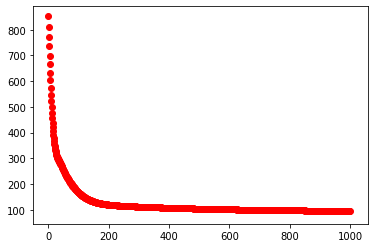

In [36]:
# Training 
for epoch in range(epochs):
    # Define Model
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train.values).float().cuda())
        labels = Variable(torch.from_numpy(y_train.values).float().cuda())

    optimizer.zero_grad()
    
    output = model(inputs)
    
    loss = criterion(output, labels)
    
    loss.backward()
    
    optimizer.step()
    
    
    plt.scatter(epoch, loss.data.cpu(), color='red')
    print(f'epoch {epoch}, loss {loss.item()}')

In [37]:
loss.data

tensor(95.2170, device='cuda:0')

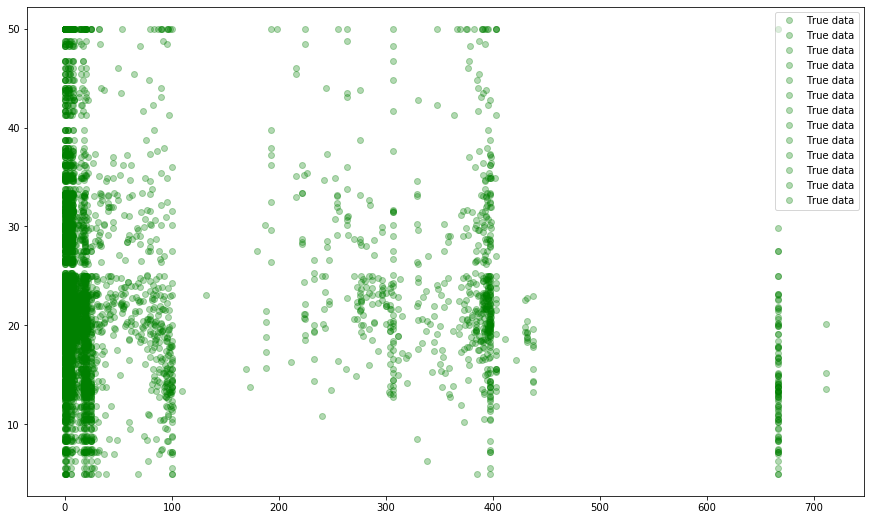

In [47]:
# Testing 
with torch.no_grad(): # Gradients not needed in testing phase.
    test_input = Variable(torch.from_numpy(np.array(x_test.values, dtype=np.float32)))
    if torch.cuda.is_available():
        predicted = model(test_input.cuda()).cpu().data.numpy()
    else:
        predicted = model(test_input).data.numpy()

plt.figure(figsize=[15,9])
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.3)
#plt.plot(x_test, predicted, '--', label='Predictions', alpha=0.7, color='black')
plt.legend(loc='best')
plt.show()

In [56]:
predicted

array([[19.299011 ],
       [21.46307  ],
       [22.95328  ],
       [23.377125 ],
       [20.78053  ],
       [25.315046 ],
       [24.28274  ],
       [22.696156 ],
       [24.962746 ],
       [23.238045 ],
       [26.91856  ],
       [22.756397 ],
       [27.276722 ],
       [27.062477 ],
       [27.43946  ],
       [24.677254 ],
       [26.03945  ],
       [26.52701  ],
       [27.157248 ],
       [23.384987 ],
       [27.225811 ],
       [27.515295 ],
       [22.377464 ],
       [15.5602665],
       [20.971886 ],
       [22.037506 ],
       [26.715849 ],
       [20.405323 ],
       [20.525887 ],
       [24.65195  ],
       [23.29586  ],
       [26.343973 ],
       [20.608332 ],
       [19.595596 ],
       [19.82927  ],
       [27.453693 ],
       [25.239145 ],
       [20.418964 ],
       [27.332996 ],
       [23.644636 ],
       [27.355003 ],
       [19.668259 ],
       [29.641882 ],
       [24.270506 ],
       [22.767256 ],
       [24.558037 ],
       [26.156664 ],
       [20.64

In [58]:
y_test = np.array(y_test, dtype=np.float32)

In [61]:
predicted == y_test

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])